In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img2=cv2.imread('../GG.png',0)
img1=cv2.resize(img2,(600,400))
img=cv2.cvtColor(img1,cv2.COLOR_BAYER_BG2GRAY)

In [ ]:
#原图像矩阵、分类的阈值、高于（低于）阈值赋予的新值、方法选择参数,返回值为阈值、处理后的图像矩阵
ret,thresh1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)#黑白二值
ret,thresh2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)#黑白二值反转
ret,thresh3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)#多像素值
ret,thresh4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)#高于阈值时像素为255
ret,thresh5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)#低于阈值时像素为255

print(ret)

cv2.imshow('thresh1',thresh1)
cv2.imshow('thresh2',thresh2)
cv2.imshow('thresh3',thresh3)
cv2.imshow('thresh4',thresh4)
cv2.imshow('thresh5',thresh5)
cv2.imshow('gray',img)
cv2.imshow('gray1',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#自适应阈值
th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,2)
th3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th4=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,5,2)
th5=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)
th6=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,2)


cv2.imshow('img',img)
cv2.imshow('th2',th2)
cv2.imshow('th3',th3)
cv2.imshow('th4',th4)
cv2.imshow('th5',th5)
cv2.imshow('th6',th6)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(231)
plt.imshow(img,cmap='gray')
plt.title('img')
plt.subplot(232)
plt.imshow(th2,cmap='gray')
plt.title('th2')
plt.subplot(233)
plt.imshow(th3,cmap='gray')
plt.title('th3')
plt.subplot(234)
plt.imshow(th4,cmap='gray')
plt.title('th4')
plt.subplot(235)
plt.imshow(th5,cmap='gray')
plt.title('th5')
plt.subplot(236)
plt.imshow(th6,cmap='gray')
plt.title('th6')

104.0


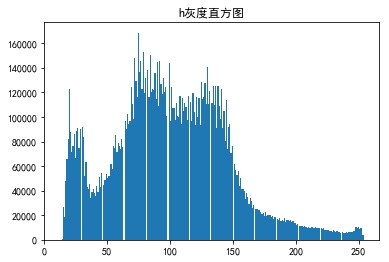

In [20]:
#otsu二值化
ret1,thresh1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)#黑白二值
ret2,thresh2=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret2)

cv2.imshow('img',img)
cv2.imshow('thresh1',thresh1)
cv2.imshow('thresh2',thresh2)
#解决matploylib中中文无法显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.hist(img.ravel(),256)
plt.title('灰度直方图')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#coding:utf8
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

filename='../GG.png' #柿子彩色图

img = cv2.imread(filename)
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grey = cv2.resize(grey,(600,400))

In [ ]:
##--------经验阈值法--------##
plt.figure(figsize=(12,6))
plt.subplot(221)
plt.imshow(grey,cmap ='gray')
plt.title("original gray pic")

img50 = np.array(grey)
img50[img50<50]=0
plt.subplot(222)
plt.imshow(img50, cmap="gray")
plt.title("threshold set to 50")

img100 = np.array(grey)
img100[img100<100]=0
plt.subplot(223)
plt.imshow(img100, cmap="gray")
plt.title("threshold set to 100")

img150 = np.array(grey)
img150[img150<150]=0
plt.subplot(224)
plt.imshow(img150, cmap="gray")
plt.title("threshold set to 150")

plt.tight_layout()
plt.show()

In [ ]:
greyblur = cv2.GaussianBlur(grey,(5,5),0)
ret,thre=cv2.threshold(greyblur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(grey,cmap='gray')
plt.title('original')
plt.subplot(122)
plt.imshow(thre,cmap='gray')
plt.title('ostu')

In [ ]:
##------转换空间再求阈值------##
rgbimg=cv2.imread(filename)
rgbimg = cv2.resize(rgbimg,(600,400))
hsvimg = cv2.cvtColor(rgbimg,cv2.COLOR_BGR2HSV)
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(hsvimg[:,:,0],cmap ='gray')
plt.title("h")
plt.subplot(132)
plt.imshow(hsvimg[:,:,1],cmap ='gray')
plt.title("s")
plt.subplot(133)
plt.imshow(hsvimg[:,:,2],cmap ='gray')
plt.title("v")
plt.show()

grey = hsvimg[:,:,2]
greyblur = cv2.GaussianBlur(grey,(5,5),0)
th,result = cv2.threshold(greyblur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(th)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(grey,cmap ='gray')
plt.title("original gray pic")
plt.subplot(122)
plt.imshow(result, cmap="gray")
plt.title("otsu threshold")
plt.show()